In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective:** Understand the relationship between product categories and their best-seller status.

**1. Crosstab Analysis:**

 - Create a crosstab between the product category and the isBestSeller status.

 - Are there categories where being a best-seller is more prevalent?

    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [32]:
crosstab_data = pd.crosstab(df['category'], df['isBestSeller'])

In [33]:
crosstab_data

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [72]:
#(crosstab_data[False]/(crosstab_data[False] + crosstab_data[True]))*100

In [74]:
crosstab_data['proportion'] = (crosstab_data[True]/(crosstab_data[False] + crosstab_data[True]))*100

In [ ]:
proportion = df.groupby(‘category’)[‘isBestSeller’].mean().sort_values(ascending=False)

In [79]:
crosstab_data.sort_values('proportion',ascending=False)

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [80]:
print(f"Categories where being a best-seller is more prevalent are: {list((crosstab_data.sort_values('proportion',ascending=False)).head(5).index)} ")

Categories where being a best-seller is more prevalent are: ['Grocery', 'Smart Home Security & Lighting', 'Health & Personal Care', 'Mobile Phone Accessories', 'Power & Hand Tools'] 


**2. Statistical Tests:**

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
 - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [91]:
selected_columns = crosstab_data.drop('proportion', axis=1)

In [96]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(selected_columns)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
#print("Expected frequencies table:")
#print(expected)


Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295


- p-value = 0 indicates that there is a correlation between data

In [103]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
a = association(selected_columns, method="cramer")

print(f"Cramér's V association between best-seller status and category : {a}")

Cramér's V association between best-seller status and category : 0.1222829439760564


- this value indicates rather weak correlation between data

**3. Visualizations:**

 - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [46]:
crosstab_data.sort_values(True,ascending=False).iloc[0:7]

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285


In [105]:
# Plotting a stacked bar chart for the 'crosstab_result' data
subset = selected_columns.sort_values(True,ascending=False).iloc[0:7]


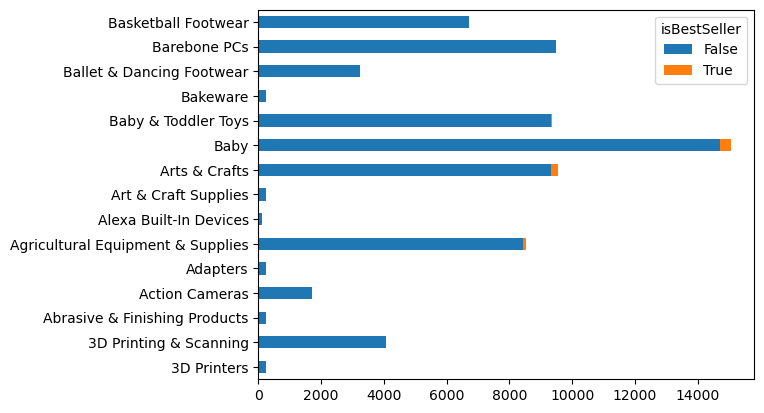

In [106]:
ax = selected_columns.iloc[0:15].plot(kind="barh", stacked=True) #,x=crosstab_data.values, y=crosstab_data.index)
ax.set_ylabel('')
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
**Objective:** Investigate how different product categories influence product prices.




**0. Preliminary Step: Remove outliers in product prices.**

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [71]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

IQR

36.0

In [107]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [109]:
lower, upper

(-44.01, 99.99000000000001)

In [118]:
df_filter = df[(df['price'] >= lower) & (df['price'] <= upper)]

In [120]:
df_filter.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


**1. Violin Plots:**

- Use a violin plot to visualize the distribution of 'price' across different product 'categories'. Filter out the top 20 categories based on count for better visualization.
 - Which product category tends to have the highest median price? Don't filter here by top categories.


In [137]:
cat_list = df_filter['category'].value_counts().head(10).index

In [145]:
#cat_list

In [140]:
#df_filter[df_filter['category'].isin(cat_list)]

<Axes: xlabel='price', ylabel='category'>

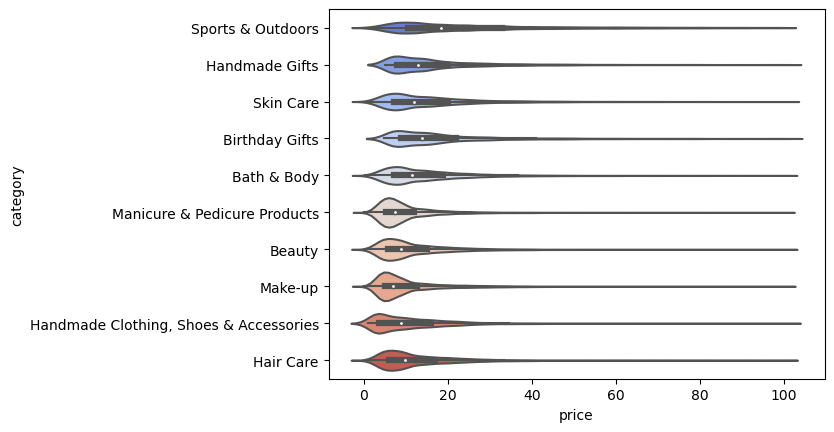

In [144]:
#plt.figure(figsize=(10, 10))
sns.violinplot(data=df_filter[df_filter['category'].isin(cat_list)], x='price', y='category', palette="coolwarm")

- The highest median price is for products from 'Sports & Outdoors' category

In [152]:
#df_filter['category'].value_counts().head(10).median()

df_filter[df_filter['category'].isin(cat_list)].groupby('category')['price'].median().sort_values(ascending=False)

category
Sports & Outdoors                         18.320
Birthday Gifts                            13.990
Handmade Gifts                            12.990
Skin Care                                 12.000
Bath & Body                               11.635
Hair Care                                  9.970
Beauty                                     8.990
Handmade Clothing, Shoes & Accessories     8.990
Manicure & Pedicure Products               7.500
Make-up                                    7.000
Name: price, dtype: float64

In [153]:
df_filter[df_filter['category'].isin(cat_list)].groupby('category')['price'].mean().sort_values(ascending=False)

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

**2. Bar Charts:**

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.


[Text(0.5, 1.0, ''), Text(0.5, 0, ''), Text(0, 0.5, '')]

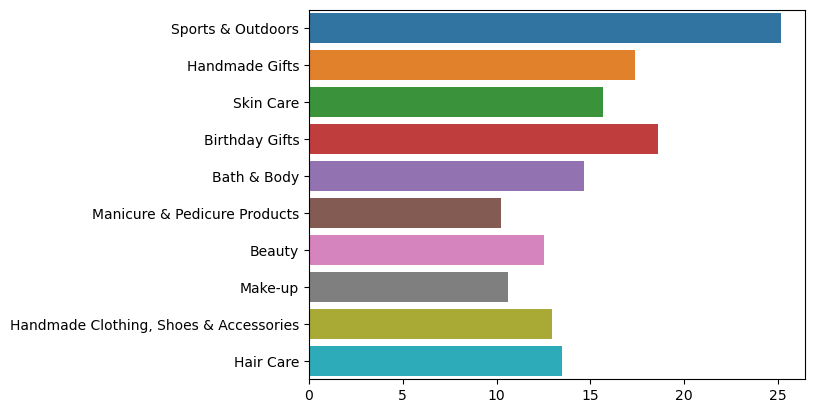

In [159]:
ax = sns.barplot(data=df_filter[df_filter['category'].isin(cat_list)], y='category' , x='price', estimator='mean', errorbar=None)
ax.set(title='', xlabel='', ylabel='')

**3. Box Plots:**

 - Visualize the distribution of product 'ratings' based on their 'category' using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

## Part 3: Investigating the Interplay Between Product Prices and Ratings
**Objective:** Analyze how product ratings (stars) correlate with product prices.

**1. Correlation Coefficients:**

 - Calculate the correlation coefficient between 'price' and 'stars'.
 - Is there a significant correlation between product price and its rating?


**2. Visualizations:**

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.